# Business Understanding

SyriaTel faces challenges with customer churn, where customers stop using their services. The goal of this project is to predict whether a customer is likely to churn based on their usage patterns, contact details and other relevant factors. The primary stakeholders are SyriaTel's management team, marketing department and customer retention team, who are responsible for understanding customer behavior and implementing strategies to retain customers. By identifying at risk customers early, SyriaTel can take proactive measures such as personalized offers, improved customer service or loyalty programs to reduce churn, enhance customer satisfaction and increase revenue.

# Data Understanding

The goal is to explore the astructure and size of the dataset, understand the key features and identify any patterns or anomalies. This includes checking for missing values, non-numeric data and distributions in columns like contract type, customer service calls and monthly charges. This step helps prepare the data for preprocessing and model development.

In [ ]:
!pip install xgboost

In [ ]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
import xgboost as xgb

In [ ]:
df = pd.read_csv('SyriaTel_customer_churn.csv')

In [ ]:
#Printing the first few rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
#Dataset Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [ ]:
#Summary of numeric columns
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
#Checking for unique values in categorical columns
categorical_columns = ['international plan', 'voice mail plan', 'churn']
for col in categorical_columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].value_counts())


Unique values in 'international plan':
no     3010
yes     323
Name: international plan, dtype: int64

Unique values in 'voice mail plan':
no     2411
yes     922
Name: voice mail plan, dtype: int64

Unique values in 'churn':
False    2850
True      483
Name: churn, dtype: int64


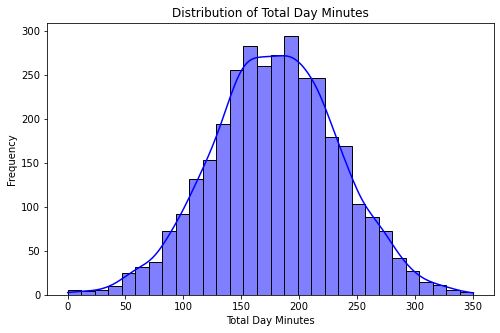

In [ ]:
#Visualize data patterns
#Distribution of total day minutes
plt.figure(figsize=(8, 5))
sns.histplot(df['total day minutes'], kde=True, bins=30, color='blue')
plt.title('Distribution of Total Day Minutes')
plt.xlabel('Total Day Minutes')
plt.ylabel('Frequency')
plt.show()

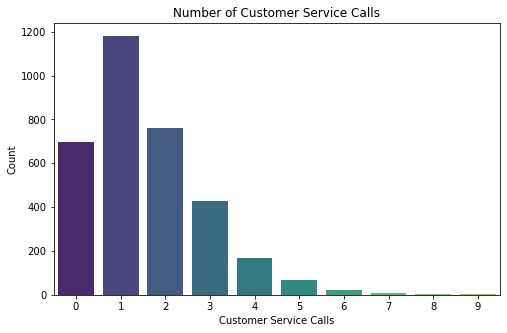

In [ ]:
#Distribution of customer service calls
plt.figure(figsize=(8, 5))
sns.countplot(x='customer service calls', data=df, palette='viridis')
plt.title('Number of Customer Service Calls')
plt.xlabel('Customer Service Calls')
plt.ylabel('Count')
plt.show()

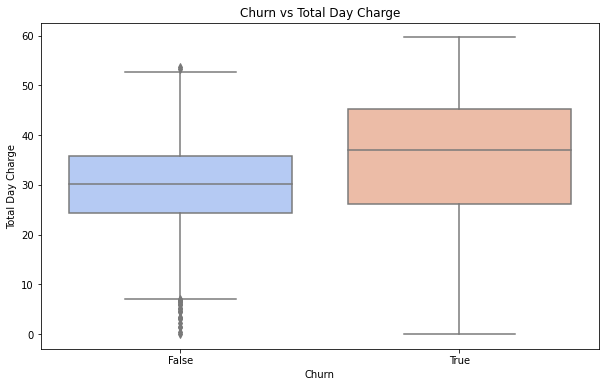

In [ ]:
#Relationship between churn and total charges
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='total day charge', data=df, palette='coolwarm')
plt.title('Churn vs Total Day Charge')
plt.xlabel('Churn')
plt.ylabel('Total Day Charge')
plt.show()

# Data Preparation
This section focuses on preparing the dataset for machine learning by addressing missing values, encoding categorical features, splitting the data and scaling numerical variables. These steps ensures the dataset is clean, interpretable by machine learning algorithms and optimized for accurate predictions.

#### Convert columns to appropriate types

In [ ]:
df['total day charge'] = pd.to_numeric(df['total day charge'], errors='coerce')
df['total eve charge'] = pd.to_numeric(df['total eve charge'], errors='coerce')

#### Encoding Categorical Varaibles

In [ ]:
#Identify categorical columns
categorical_columns = ['international plan', 'voice mail plan']
print("\nUnique values before encoding: ")
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")


Unique values before encoding: 
international plan: ['no' 'yes']
voice mail plan: ['yes' 'no']


#### Check for duplicates

In [ ]:
df.duplicated().sum()

0

#### Removing outliers

In [ ]:
#Count the number of rows before and after filtering
df_filtered = df[df['churn'] == True]

original_count = df.shape[0]
filtered_count = df_filtered.shape[0]
print(f"Original count: {original_count}, Filtered count: {filtered_count}")

#Checking summary statistics
print("Summary statistics for original Dataframe:")
print(df[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']].describe())

print("Summary statistics for filtered Dataframe:")
print(df_filtered[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']].describe())

#Checking for outliers in the filtered dataframe
Q1_filtered = df_filtered[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']].quantile(0.25)
Q3_filtered = df_filtered[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']].quantile(0.75)
IQR_filtered = Q3_filtered - Q1_filtered

outliers_filtered = df_filtered[(
    (df_filtered[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']] < (Q1_filtered - 1.5 * IQR_filtered)) |
    (df_filtered[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']] > (Q3_filtered + 1.5 * IQR_filtered))).any(axis=1)]
print(f"Number of outliers in filtered Dataframe: {outliers_filtered.shape[0]}")

Original count: 3333, Filtered count: 483
Summary statistics for original Dataframe:
       total day minutes  total eve minutes  total night minutes  \
count        3333.000000        3333.000000          3333.000000   
mean          179.775098         200.980348           200.872037   
std            54.467389          50.713844            50.573847   
min             0.000000           0.000000            23.200000   
25%           143.700000         166.600000           167.000000   
50%           179.400000         201.400000           201.200000   
75%           216.400000         235.300000           235.300000   
max           350.800000         363.700000           395.000000   

       total intl minutes  
count         3333.000000  
mean            10.237294  
std              2.791840  
min              0.000000  
25%              8.500000  
50%             10.300000  
75%             12.100000  
max             20.000000  
Summary statistics for filtered Dataframe:
       

#### Split Data into training and testing sets

In [ ]:
#Define the target variable (churn) and features
X = df_filtered.drop(columns=['churn'])
y = df_filtered['churn'].apply(lambda x: 1 if x == 'yes' else 0)

In [ ]:
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (338, 20)
Testing set size: (145, 20)


In [ ]:
#Identify numeric columns to scale
numeric_columns = ['account length', 'total day minutes', 'total day calls', 'total day charge',
                   'total eve minutes', 'total eve calls', 'total eve charge',
                   'total night minutes', 'total night calls', 'total night charge',
                   'total intl minutes', 'total intl calls', 'total intl charge',
                   'customer service calls']

#Create copies of the DataFrames to avoid SettingWithCopyWarning
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

scaler = StandardScaler()
X_train_copy.loc[:, numeric_columns] = scaler.fit_transform(X_train_copy[numeric_columns])
X_test_copy.loc[:, numeric_columns] = scaler.transform(X_test_copy[numeric_columns])

#Display the first few rows of the scaled training data
X_train_copy.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
2515,MD,0.204723,510,372-8883,no,no,0,-1.187020,-0.621377,-1.186789,0.023684,-0.845775,0.023300,-0.452892,-0.588461,-0.453158,0.495580,-0.847839,0.494713,1.447616
1310,WA,-1.472454,510,399-3083,no,no,0,-1.821563,0.217048,-1.821740,-0.492401,0.445516,-0.492591,-0.467401,0.549523,-0.466976,-1.188633,0.325024,-1.186501,-0.691375
2629,NH,0.967076,415,402-3370,no,yes,32,1.654880,-0.435060,1.654973,1.368221,0.296521,1.367813,0.057021,0.549523,0.058122,-1.444926,-0.456884,-1.444107,-0.691375
1442,ME,-0.023983,510,390-9627,no,no,0,-0.151787,0.682839,-0.151743,-0.069444,-0.696780,-0.070291,-0.117096,-1.330625,-0.116911,-0.859113,-0.456884,-0.861105,-0.691375
1746,DC,-1.091278,408,355-3801,no,no,0,-0.385641,2.126793,-0.385761,-0.073325,-0.597450,-0.072574,0.859200,-0.093685,0.859587,1.044780,0.715978,1.050599,-0.691375


#### Checking for missing values

In [ ]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
dtype: int64
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total n

#### Correlation matrix

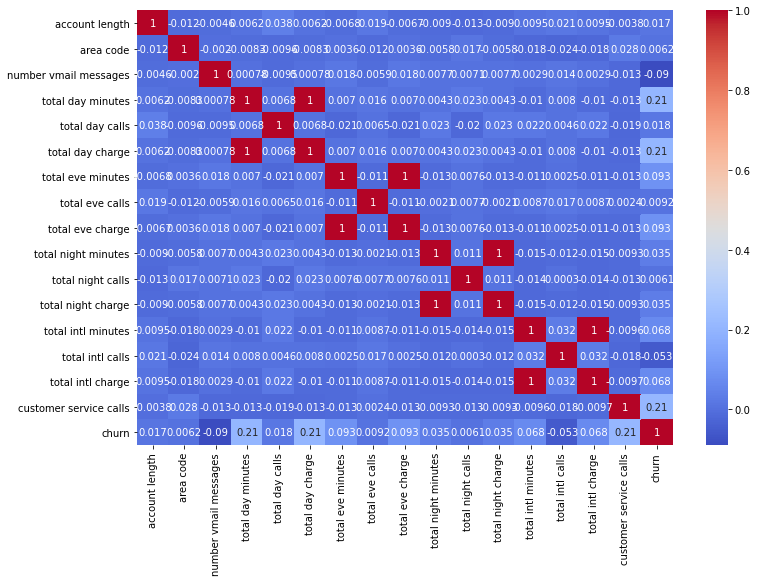

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

#### Handling class imbalance using SMOTE

In [ ]:
print(y_train.value_counts())

0    338
Name: churn, dtype: int64


In [ ]:
print(df['churn'].value_counts())

False    2850
True      483
Name: churn, dtype: int64


In [ ]:
#Assuming 'df' is your DataFrame and 'churn' is your target column
X = df.drop('churn', axis=1) #Features
y = df['churn'] #Target

#Remove non-numeric columns e.g 'phone number', 'area code' and 'state'
X_numeric = X.select_dtypes(include=['number'])

#Applying SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_numeric, y)

#Split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#Initialize a logistic regression model
model = LogisticRegression(max_iter=1000)

#Apply RFE for feature selection
rfe = RFE(model, n_features_to_select=20)
X_train_rfe = rfe.fit_transform(X_train_resampled, y_train_resampled)

#Get the selected features
selected_features = X_resampled.columns[rfe.support_]
print(f"Selected features: {selected_features}")


Selected features: Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')


In [ ]:
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())

Class distribution after SMOTE:
True     2850
False    2850
Name: churn, dtype: int64
